In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)

### Data format

* `rank` the ranking of the company
* `name` the name of the company
* `country` the country the company is situated in
* `category` a category describing the products the company produces
* `sales` the amoung of sales of the company in billion US dollars
* `profits` the profit of the company in billion US dollars
* `assets` the assets of the company in billion US dollars
* `marketvalue` the market value of the company in billion US dollars

In [3]:
forbes2000 = pd.read_csv('Forbes2000.csv')
forbes2000.drop("Unnamed: 0", axis=1, inplace=True)
forbes2000.head()

,rank,name,country,category,sales,profits,assets,marketvalue
0,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


In [4]:
forbes2000.describe()

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000


In [5]:
companies = forbes2000['name']
companies[0:10]

0              Citigroup
1       General Electric
2    American Intl Group
3             ExxonMobil
4                     BP
5        Bank of America
6             HSBC Group
7           Toyota Motor
8             Fannie Mae
9        Wal-Mart Stores
Name: name, dtype: object

In [6]:
(forbes2000['assets'] > 1000).value_counts()

False    1997
True        3
Name: assets, dtype: int64

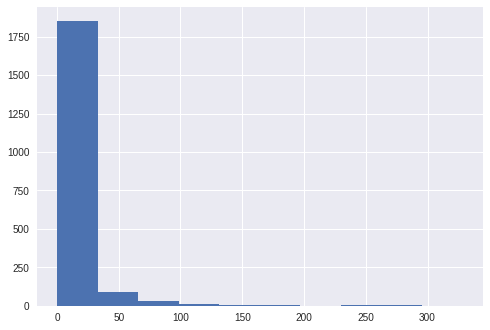

In [7]:
forbes2000['marketvalue'].hist()

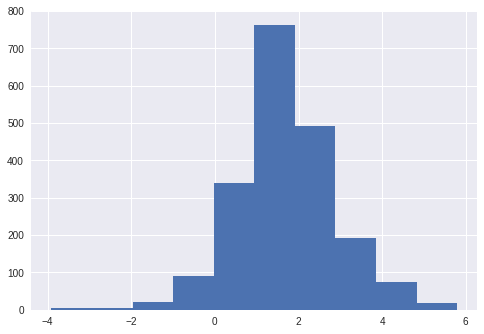

In [8]:
np.log(forbes2000['marketvalue']).hist()

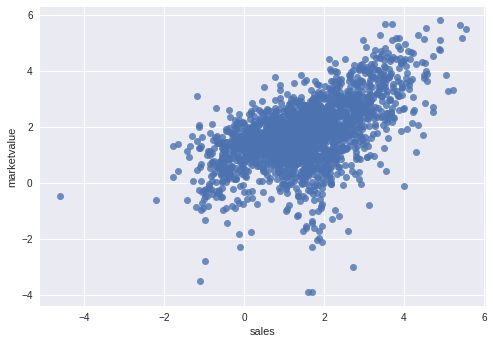

In [9]:
sns.regplot(x="sales", y="marketvalue", data=np.log(forbes2000[['marketvalue', 'sales']]), fit_reg=False)

/home/julius/learn/data-science/anaconda3/envs/dat13/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


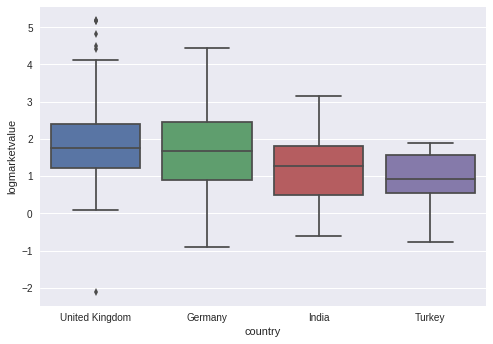

In [10]:
subset = forbes2000[forbes2000['country'].isin(['United Kingdom', 'Germany', 'India', 'Turkey'])]
subset['logmarketvalue'] = np.log(subset['marketvalue'])
sns.boxplot(x="country", y="logmarketvalue", data=subset)

# Exercises

## Ex. 1.1

Calculate the median profit for the copmanies in the US and the median profit for the companies in the UK, France, Germany.

In [11]:
print("US Median:", forbes2000[forbes2000['country'] == "United States"]['profits'].median())
print("UK, France, Germany Median:", forbes2000[forbes2000['country'].isin(['United Kingdom', 'France', 'Germany'])]['profits'].median())

US Median: 0.24
UK, France, Germany Median: 0.21


## Ex. 1.2

Find all German companies with negative profit.

In [12]:
forbes2000[(forbes2000['country'] == 'Germany') & (forbes2000['profits'] < 0)]

,rank,name,country,category,sales,profits,assets,marketvalue
349,350,Allianz Worldwide,Germany,Insurance,96.88,-1.23,851.24,48.07
363,364,Deutsche Telekom,Germany,Telecommunications services,56.40,-25.83,132.01,84.18
396,397,E.ON,Germany,Utilities,37.95,-0.73,115.57,43.96
430,431,HVB-HypoVereinsbank,Germany,Banking,40.52,-0.87,705.36,14.49
499,500,Commerzbank,Germany,Banking,22.43,-0.31,437.86,11.00
797,798,Infineon Technologies,Germany,Semiconductors,7.18,-0.51,11.79,10.73
868,869,BHW Holding,Germany,Diversified financials,7.46,-0.38,117.96,2.98
925,926,Bankgesellschaft Berlin,Germany,Banking,9.43,-0.74,182.69,2.30
1033,1034,W&W-Wustenrot,Germany,Diversified financials,7.57,-0.08,56.44,1.89
1186,1187,mg technologies,Germany,Chemicals,8.54,-0.13,6.45,3.18


## Ex. 1.3

To which business category do most of the permuda island companies belong?

In [13]:
forbes2000[forbes2000['country'] == 'Bermuda'].groupby('category')['category'].count().argmax()

'Insurance'

## Ex. 1.4 

For the 50 companies in the Forbes data set with the highest profits, plot sales against assets (or some suitable transformation of each variable), labeling each point with the appropriate country name which may need to be abbreviated to avoid making the plot look to 'messy'.

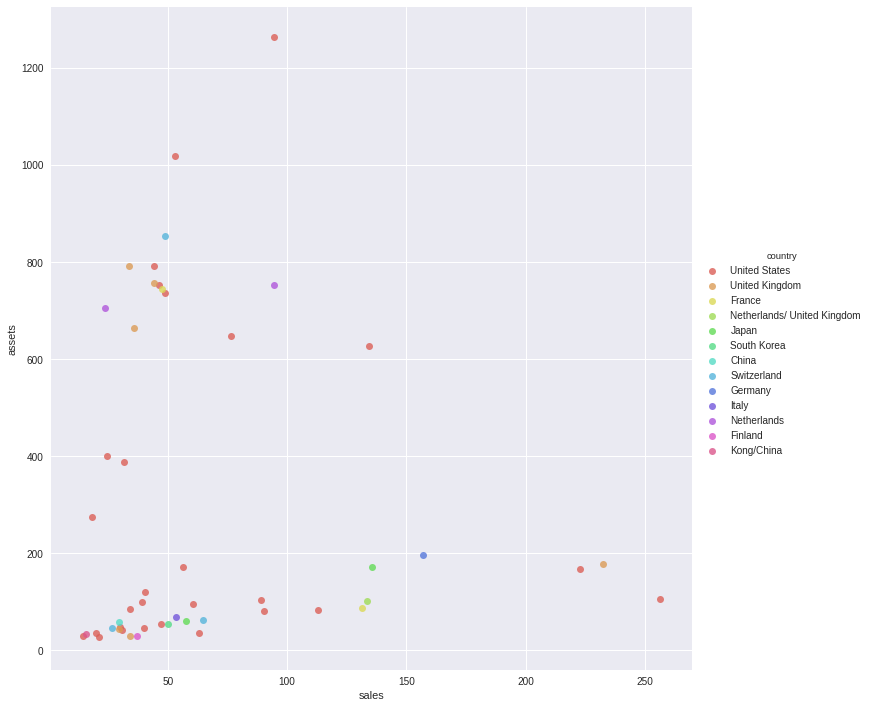

In [14]:
companies = forbes2000.sort_values(by='profits', ascending=False)[0:50]

sns.lmplot(
    x='sales', 
    y='assets',
    hue='country',
    data=companies,
    fit_reg=False,
    size=10,
    palette=sns.color_palette("hls", 13))


## Ex. 1.5

Find the average value of sales for the companies in each country in the Forbes data set, and find the number of companies in each country with profits above 5 billion US dollars.

In [15]:
print("Average value of sales for the companies in each country")

forbes2000.groupby('country')['sales'].mean().sort_values(ascending=False)[0:10]

Average value of sales for the companies in each country


country
Netherlands/ United Kingdom    92.100000
Germany                        20.781385
France                         20.102063
Netherlands                    17.020714
Korea                          15.005000
Luxembourg                     14.185000
Switzerland                    12.456765
Australia/ United Kingdom      11.595000
Norway                         10.780000
United Kingdom                 10.445109
Name: sales, dtype: float64

In [16]:
print("Number of companies in each country with profits above 5 billion US dollars.")

forbes2000[forbes2000['profits'] > 5].groupby('country')['profits'].count().sort_values(ascending=False)

Number of companies in each country with profits above 5 billion US dollars.


country
United States                  20
United Kingdom                  3
Switzerland                     3
South Korea                     1
Netherlands/ United Kingdom     1
Japan                           1
Germany                         1
France                          1
China                           1
Name: profits, dtype: int64

## Ex. 1.6

List all the products made by companies in the UK.

In [17]:
list(forbes2000[forbes2000['country'] == 'United Kingdom']['category'].unique())

['Oil & gas operations',
 'Banking',
 'Drugs & biotechnology',
 'Telecommunications services',
 'Insurance',
 'Food markets',
 'Materials',
 'Food drink & tobacco',
 'Utilities',
 'Hotels restaurants & leisure',
 'Retailing',
 'Diversified financials',
 'Trading companies',
 'Household & personal products',
 'Transportation',
 'Chemicals',
 'Media',
 'Construction',
 'Aerospace & defense',
 'Conglomerates',
 'Health care equipment & services',
 'Business services & supplies',
 'Consumer durables',
 'Capital goods',
 'Software & services',
 'Technology hardware & equipment']

## Ex. 1.7

Plot sales against market value for companies in the UK and in Germany using different plotting symbols for the two countries.

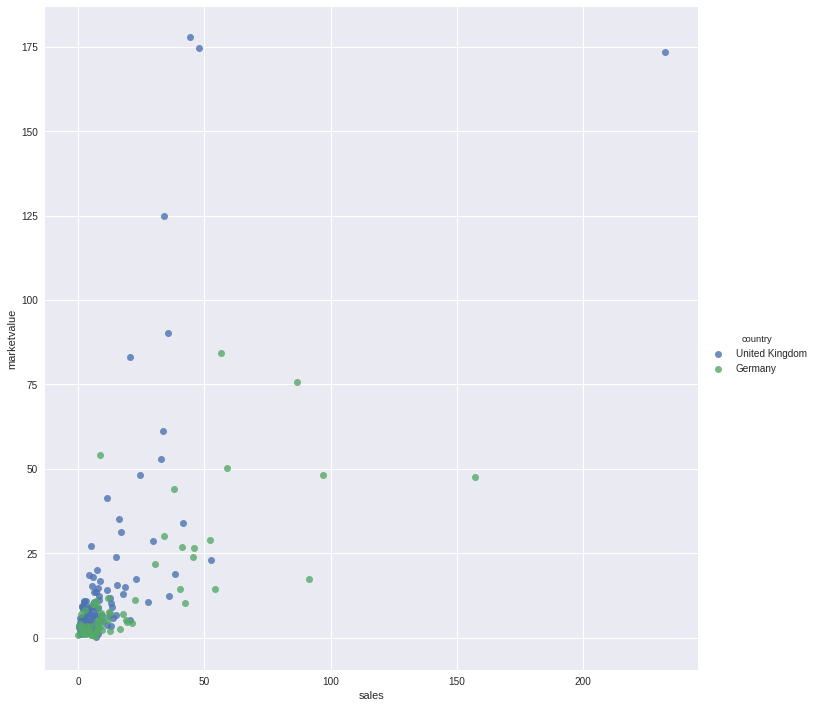

In [18]:
sns.lmplot(
    x='sales', 
    y='marketvalue',
    hue='country',
    data=forbes2000[forbes2000['country'].isin(['United Kingdom', 'Germany'])],
    fit_reg=False,
    size=10)

## Ex. 1.8

For the ten companies in the UK with the greatest profits construct a bar chart of profits labeled with the companies' name.

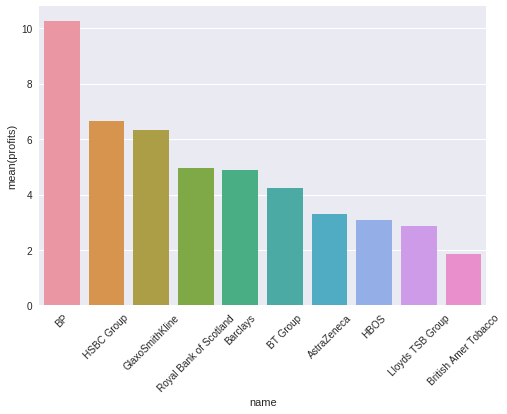

In [19]:
plot = sns.barplot(
    x='name',
    y='profits',
    data=forbes2000[forbes2000['country'] == 'United Kingdom'].sort_values(by='profits', ascending=False)[0:10])

for item in plot.get_xticklabels():
    item.set_rotation(45)

## Ex. 1.9

How many of the 20 companies with the greatest market value are from the US and how many are from the UK?

In [20]:
forbes2000.sort_values(by='marketvalue', ascending=False)[0:20].groupby('country')['country'].count()

country
Netherlands/ United Kingdom     1
United Kingdom                  4
United States                  15
Name: country, dtype: int64

## Ex. 1.10

Construct a histogram of profits for all copmanies in Germany with assets above three billion dollars; how many such companies are there? And which product does the company with the greatest profit make?

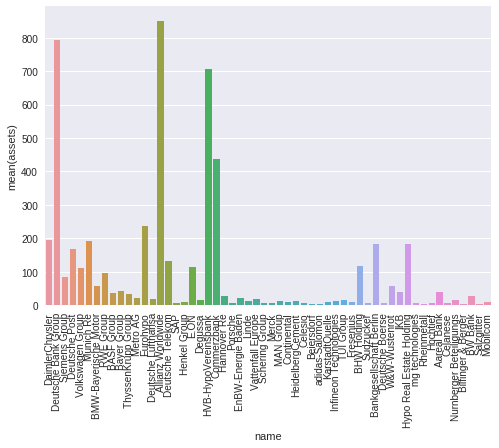

In [21]:
companies = forbes2000[(forbes2000['country'] == 'Germany') & (forbes2000['assets'] > 3)]

plot = sns.barplot(
    x='name',
    y='assets',
    data=companies)

for item in plot.get_xticklabels():
    item.set_rotation(90)

In [22]:
print("There are", companies['name'].count(), "companies.")

print("Company with the greatest profit makes", companies.sort_values(by='profits', ascending=False).head(1)['category'].values[0])

There are 56 companies.
Company with the greatest profit makes Consumer durables
